In [1845]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
import lightgbm as lgb
warnings.filterwarnings(action='ignore')

In [1846]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-Glass-Quality-Prediction\train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-Glass-Quality-Prediction\Test.csv')

In [1847]:
train.head()

grade_A_Component_1  grade_A_Component_2  max_luminosity  thickness  xmin  \
0                    0                    1             150         36   144   
1                    1                    0             134         55  1144   
2                    1                    0             135         65   950   
3                    0                    1             123         35    41   
4                    1                    0             138         69   462   

   xmax     ymin     ymax  pixel_area     log_area  x_component_1  \
0   172   947225   947332         439   439.099273              0   
1  1152  2379058  2379624         329   329.205616              1   
2   974  1038442  1036754         300   300.120598              0   
3   220  1705580  1705604        6803  6803.778622              0   
4   466  1088124  1086579         251   251.401943              0   

   x_component_2  x_component_3  x_component_4  x_component_5  class  
0              0              1              0              0      1  
1              0              0              0              0      1  
2              0              0              0              0      2  
3              0              1              0              0      1  
4              0              0              0              0      2

In [1848]:
test.head()

grade_A_Component_1  grade_A_Component_2  max_luminosity  thickness  xmin  \
0                    1                    0             123         65    33   
1                    0                    1             158         99   125   
2                    0                    1             120         35    64   
3                    0                    1             130         39    57   
4                    1                    0             142         75    23   

   xmax      ymin      ymax  pixel_area     log_area  x_component_1  \
0    54   1646439   1646893         632   632.391749              0   
1   132    189874    189529         421   421.928609              0   
2    75  12986873  12986862         272   272.212214              1   
3   177    309634    310824        3312  3312.310581              0   
4    79   5368307   5367467         862   862.499179              0   

   x_component_2  x_component_3  x_component_4  x_component_5  
0              1              0              0              0  
1              0              0              0              0  
2              0              0              0              0  
3              0              1              0              0  
4              0              0              0              0

In [1849]:
train.describe()

grade_A_Component_1  grade_A_Component_2  max_luminosity    thickness  \
count          1358.000000          1358.000000     1358.000000  1358.000000   
mean              0.406480             0.593520      137.893225    78.977909   
std               0.491357             0.491357       20.480512    55.324842   
min               0.000000             0.000000       71.000000    35.000000   
25%               0.000000             0.000000      127.000000    42.000000   
50%               0.000000             1.000000      137.000000    66.000000   
75%               1.000000             1.000000      146.000000    83.000000   
max               1.000000             1.000000      266.000000   305.000000   

              xmin         xmax          ymin          ymax    pixel_area  \
count  1358.000000  1358.000000  1.358000e+03  1.358000e+03   1358.000000   
mean    567.370398   614.032401  1.660107e+06  1.660139e+06   1903.402798   
std     522.013094   500.505513  1.778153e+06  1.778177e+06   3839.156721   
min       0.000000     4.000000  7.527000e+03  7.453000e+03      3.000000   
25%      53.000000   192.000000  4.662742e+05  4.666918e+05    234.000000   
50%     407.500000   457.000000  1.216168e+06  1.214700e+06    346.000000   
75%    1041.750000  1064.000000  2.210012e+06  2.210076e+06    915.250000   
max    1692.000000  1717.000000  1.291748e+07  1.291731e+07  37392.000000   

           log_area  x_component_1  x_component_2  x_component_3  \
count   1358.000000    1358.000000    1358.000000    1358.000000   
mean    1903.896240       0.081738       0.106038       0.197349   
std     3839.163241       0.274066       0.308000       0.398145   
min        3.445293       0.000000       0.000000       0.000000   
25%      234.335948       0.000000       0.000000       0.000000   
50%      346.044490       0.000000       0.000000       0.000000   
75%      915.367817       0.000000       0.000000       0.000000   
max    37392.672970       1.000000       1.000000       1.000000   

       x_component_4  x_component_5        class  
count    1358.000000    1358.000000  1358.000000  
mean        0.035346       0.027982     1.346834  
std         0.184721       0.164983     0.476138  
min         0.000000       0.000000     1.000000  
25%         0.000000       0.000000     1.000000  
50%         0.000000       0.000000     1.000000  
75%         0.000000       0.000000     2.000000  
max         1.000000       1.000000     2.000000

In [1850]:
test.describe()

grade_A_Component_1  grade_A_Component_2  max_luminosity   thickness  \
count           583.000000           583.000000      583.000000  583.000000   
mean              0.385935             0.614065      136.662093   78.149228   
std               0.487233             0.487233       20.112588   54.858769   
min               0.000000             0.000000       43.000000   35.000000   
25%               0.000000             0.000000      126.000000   42.000000   
50%               0.000000             1.000000      137.000000   65.000000   
75%               1.000000             1.000000      146.000000   85.000000   
max               1.000000             1.000000      232.000000  305.000000   

              xmin         xmax          ymin          ymax     pixel_area  \
count   583.000000   583.000000  5.830000e+02  5.830000e+02     583.000000   
mean    588.096055   635.425386  1.628701e+06  1.628821e+06    2368.331046   
std     517.598327   491.010380  1.767507e+06  1.767550e+06    7376.877610   
min       1.000000     9.000000  7.438000e+03  7.414000e+03      22.000000   
25%      60.000000   198.000000  4.947205e+05  4.957495e+05     235.000000   
50%     484.000000   518.000000  1.168512e+06  1.169583e+06     376.000000   
75%    1064.500000  1081.500000  2.105844e+06  2.105480e+06    1268.500000   
max    1709.000000  1718.000000  1.298687e+07  1.298686e+07  152727.000000   

            log_area  x_component_1  x_component_2  x_component_3  \
count     583.000000     583.000000     583.000000     583.000000   
mean     2368.838180       0.080617       0.078902       0.210978   
std      7376.880091       0.272481       0.269818       0.408353   
min        22.200599       0.000000       0.000000       0.000000   
25%       235.420439       0.000000       0.000000       0.000000   
50%       376.661070       0.000000       0.000000       0.000000   
75%      1268.945018       0.000000       0.000000       0.000000   
max    152727.515949       1.000000       1.000000       1.000000   

       x_component_4  x_component_5  
count     583.000000     583.000000  
mean        0.041166       0.029160  
std         0.198845       0.168398  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [1851]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 16 columns):
grade_A_Component_1    1358 non-null int64
grade_A_Component_2    1358 non-null int64
max_luminosity         1358 non-null int64
thickness              1358 non-null int64
xmin                   1358 non-null int64
xmax                   1358 non-null int64
ymin                   1358 non-null int64
ymax                   1358 non-null int64
pixel_area             1358 non-null int64
log_area               1358 non-null float64
x_component_1          1358 non-null int64
x_component_2          1358 non-null int64
x_component_3          1358 non-null int64
x_component_4          1358 non-null int64
x_component_5          1358 non-null int64
class                  1358 non-null int64
dtypes: float64(1), int64(15)
memory usage: 169.8 KB


In [1852]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 15 columns):
grade_A_Component_1    583 non-null int64
grade_A_Component_2    583 non-null int64
max_luminosity         583 non-null int64
thickness              583 non-null int64
xmin                   583 non-null int64
xmax                   583 non-null int64
ymin                   583 non-null int64
ymax                   583 non-null int64
pixel_area             583 non-null int64
log_area               583 non-null float64
x_component_1          583 non-null int64
x_component_2          583 non-null int64
x_component_3          583 non-null int64
x_component_4          583 non-null int64
x_component_5          583 non-null int64
dtypes: float64(1), int64(14)
memory usage: 68.4 KB


In [1853]:
df = train.append(test,ignore_index=True)

In [1854]:
df.shape

(1941, 16)

In [1855]:
df.head()

class  grade_A_Component_1  grade_A_Component_2     log_area  \
0    1.0                    0                    1   439.099273   
1    1.0                    1                    0   329.205616   
2    2.0                    1                    0   300.120598   
3    1.0                    0                    1  6803.778622   
4    2.0                    1                    0   251.401943   

   max_luminosity  pixel_area  thickness  x_component_1  x_component_2  \
0             150         439         36              0              0   
1             134         329         55              1              0   
2             135         300         65              0              0   
3             123        6803         35              0              0   
4             138         251         69              0              0   

   x_component_3  x_component_4  x_component_5  xmax  xmin     ymax     ymin  
0              1              0              0   172   144   947332   947225  
1              0              0              0  1152  1144  2379624  2379058  
2              0              0              0   974   950  1036754  1038442  
3              1              0              0   220    41  1705604  1705580  
4              0              0              0   466   462  1086579  1088124

In [1856]:
df['class'].value_counts()

1.0    887
2.0    471
Name: class, dtype: int64

In [1857]:
train['class'] = train['class'].astype('category')

In [1858]:
train.head(1)

grade_A_Component_1  grade_A_Component_2  max_luminosity  thickness  xmin  \
0                    0                    1             150         36   144   

   xmax    ymin    ymax  pixel_area    log_area  x_component_1  x_component_2  \
0   172  947225  947332         439  439.099273              0              0   

   x_component_3  x_component_4  x_component_5 class  
0              1              0              0     1

In [1859]:
train.groupby(['x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5'])['class'].value_counts()

x_component_1  x_component_2  x_component_3  x_component_4  x_component_5  class
0              0              0              0              0              2        471
                                                                           1        278
                                                            1              1         38
                                             1              0              1         48
                              1              0              0              1        268
               1              0              0              0              1        144
1              0              0              0              0              1        111
Name: class, dtype: int64

In [1860]:
temp= train.groupby(['x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5']).get_group((0,0,0,0,0)).reset_index(drop = True)

In [1861]:
train = temp
temp.head(5)

grade_A_Component_1  grade_A_Component_2  max_luminosity  thickness  xmin  \
0                    1                    0             135         65   950   
1                    1                    0             138         69   462   
2                    0                    1             136         42   348   
3                    0                    1             135         36   806   
4                    1                    0             130         75  1635   

   xmax     ymin     ymax  pixel_area    log_area  x_component_1  \
0   974  1038442  1036754         300  300.120598              0   
1   466  1088124  1086579         251  251.401943              0   
2   361  7202710  7202537         264  264.243269              0   
3   831   299775   301108         264  264.389126              0   
4  1647  2115008  2115955         368  368.980284              0   

   x_component_2  x_component_3  x_component_4  x_component_5 class  
0              0              0              0              0     2  
1              0              0              0              0     2  
2              0              0              0              0     1  
3              0              0              0              0     2  
4              0              0              0              0     1

In [1862]:
ind_1 = []
ind_1.extend(test[test.x_component_1==1].index.tolist())
ind_1.extend(test[test.x_component_2==1].index.tolist())
ind_1.extend(test[test.x_component_3==1].index.tolist())
ind_1.extend(test[test.x_component_4==1].index.tolist())
ind_1.extend(test[test.x_component_5==1].index.tolist())

In [1863]:
test = test.groupby(['x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5']).get_group((0,0,0,0,0))

In [1864]:
test.head()

grade_A_Component_1  grade_A_Component_2  max_luminosity  thickness  xmin  \
1                     0                    1             158         99   125   
4                     1                    0             142         75    23   
9                     0                    1             139        178   615   
10                    0                    1             150        133    82   
12                    0                    1             127         45   486   

    xmax     ymin     ymax  pixel_area    log_area  x_component_1  \
1    132   189874   189529         421  421.928609              0   
4     79  5368307  5367467         862  862.499179              0   
9    625     9699    10171         125  125.197614              0   
10    97  1522715  1523025         673  673.951720              0   
12   503  1343109  1343182         489  489.189096              0   

    x_component_2  x_component_3  x_component_4  x_component_5  
1               0              0              0              0  
4               0              0              0              0  
9               0              0              0              0  
10              0              0              0              0  
12              0              0              0              0

# WORK

In [1865]:
train.groupby('grade_A_Component_1')['class'].value_counts()

grade_A_Component_1  class
0                    2        285
                     1         85
1                    1        193
                     2        186
Name: class, dtype: int64

In [1866]:
train.groupby('grade_A_Component_2')['class'].value_counts()

grade_A_Component_2  class
0                    1        193
                     2        186
1                    2        285
                     1         85
Name: class, dtype: int64

In [1867]:
train.groupby(['grade_A_Component_1','grade_A_Component_2'])['class'].value_counts()

grade_A_Component_1  grade_A_Component_2  class
0                    1                    2        285
                                          1         85
1                    0                    1        193
                                          2        186
Name: class, dtype: int64

# Max"

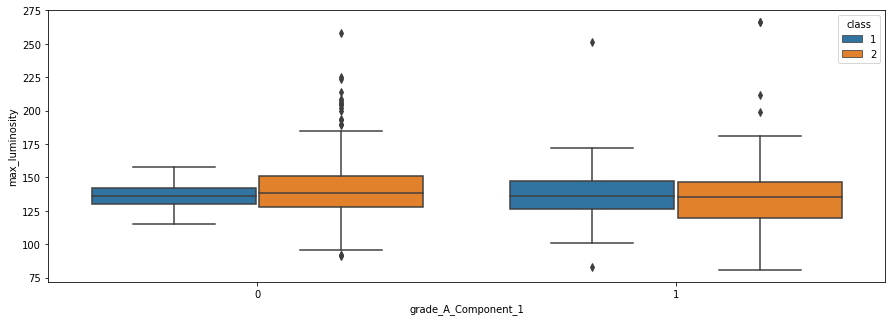

In [1868]:
plt.figure(figsize=(15,5))
sns.boxplot(data=train,x='grade_A_Component_1',y='max_luminosity',hue='class')

# Thickness

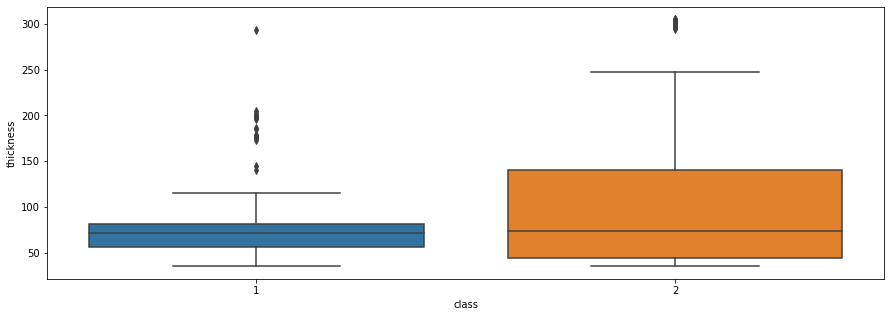

In [1869]:
plt.figure(figsize=(15,5))
sns.boxplot(data=train,x='class',y='thickness')

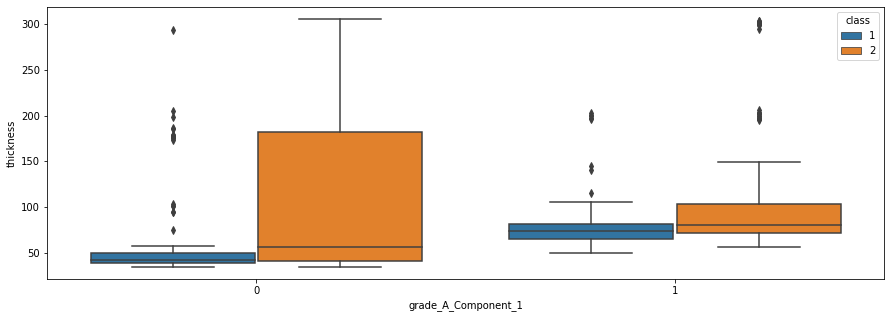

In [1870]:
plt.figure(figsize=(15,5))
sns.boxplot(data=train,x='grade_A_Component_1',y='thickness',hue='class')

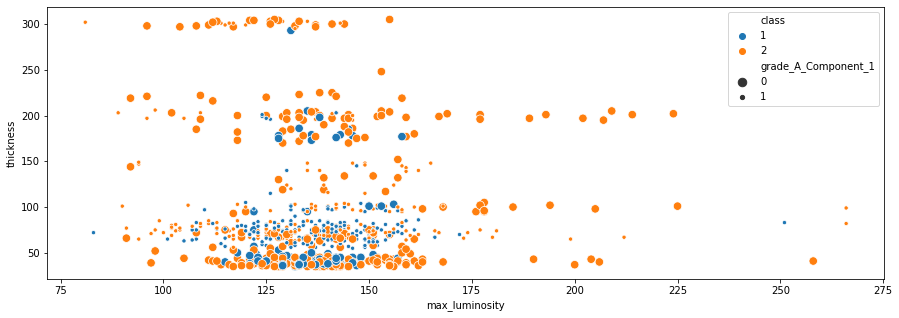

In [1871]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='max_luminosity',y='thickness',hue='class',size='grade_A_Component_1')

In [1872]:
train.head(1)

grade_A_Component_1  grade_A_Component_2  max_luminosity  thickness  xmin  \
0                    1                    0             135         65   950   

   xmax     ymin     ymax  pixel_area    log_area  x_component_1  \
0   974  1038442  1036754         300  300.120598              0   

   x_component_2  x_component_3  x_component_4  x_component_5 class  
0              0              0              0              0     2

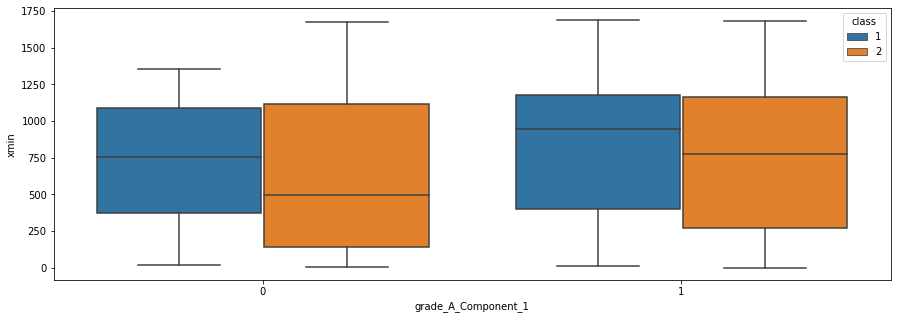

In [1873]:
plt.figure(figsize=(15,5))
sns.boxplot(data=train,x='grade_A_Component_1', y='xmin',hue='class')

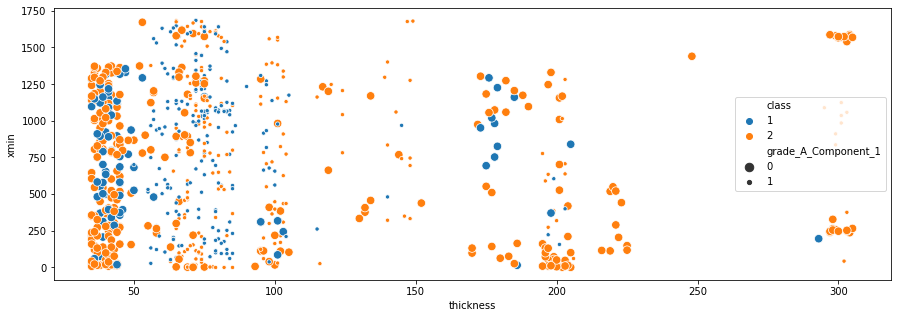

In [1874]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='xmin',hue='class',size='grade_A_Component_1')

xmax

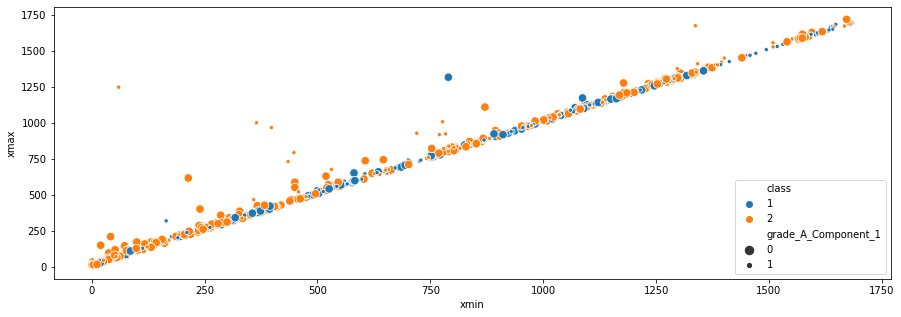

In [1875]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='xmin',y='xmax',hue='class',size='grade_A_Component_1')

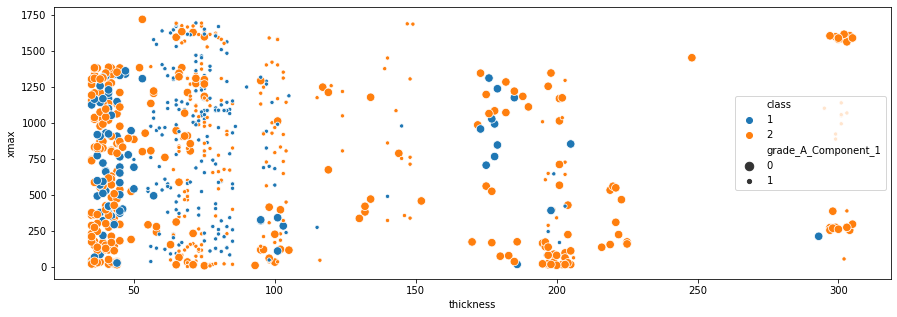

In [1876]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='xmax',hue='class',size='grade_A_Component_1')

# YMAXMIN

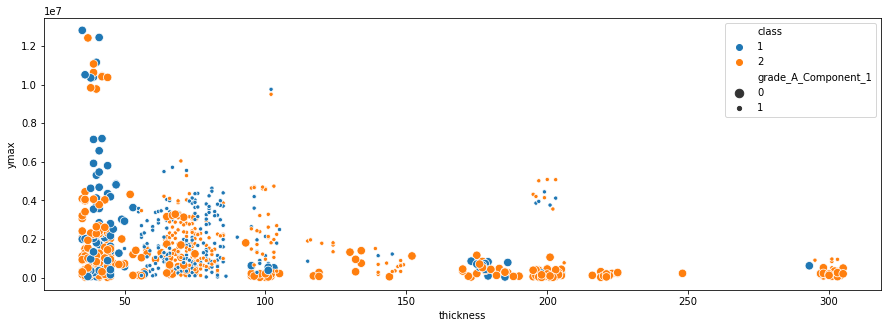

In [1877]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='ymax',hue='class',size='grade_A_Component_1')

In [1878]:
train.head(1)

grade_A_Component_1  grade_A_Component_2  max_luminosity  thickness  xmin  \
0                    1                    0             135         65   950   

   xmax     ymin     ymax  pixel_area    log_area  x_component_1  \
0   974  1038442  1036754         300  300.120598              0   

   x_component_2  x_component_3  x_component_4  x_component_5 class  
0              0              0              0              0     2

# Pixel area

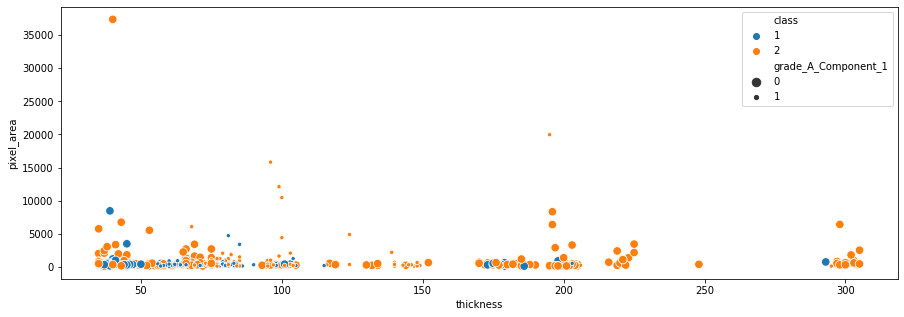

In [1879]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='pixel_area',hue='class',size='grade_A_Component_1')

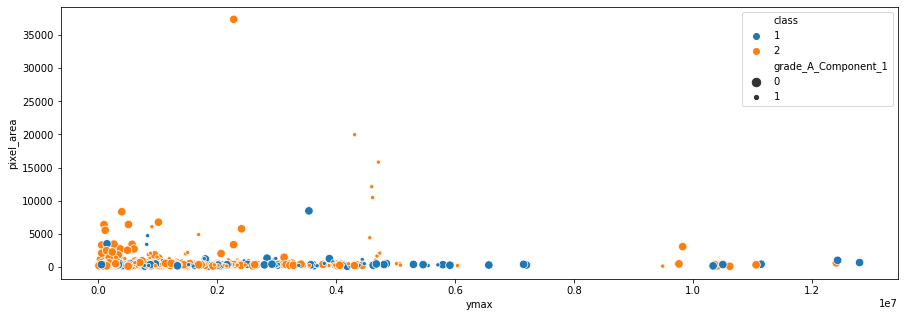

In [1880]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='ymax',y='pixel_area',hue='class',size='grade_A_Component_1')

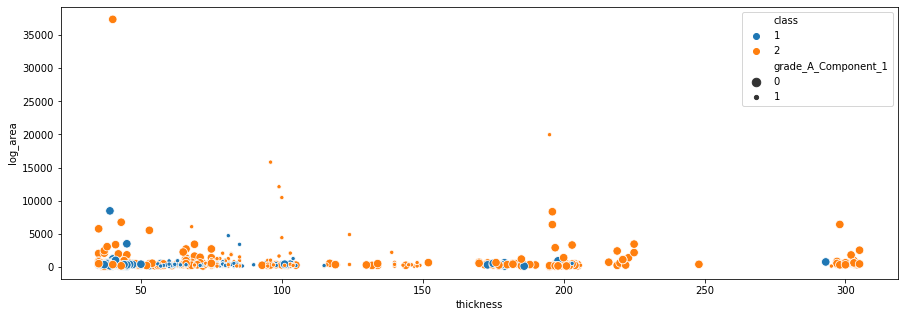

In [1881]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='log_area',hue='class',size='grade_A_Component_1')

# Main

In [1882]:
train.head(10)

grade_A_Component_1  grade_A_Component_2  max_luminosity  thickness  xmin  \
0                    1                    0             135         65   950   
1                    1                    0             138         69   462   
2                    0                    1             136         42   348   
3                    0                    1             135         36   806   
4                    1                    0             130         75  1635   
5                    1                    0             108         65  1646   
6                    1                    0             154         96   664   
7                    0                    1             131         61   751   
8                    1                    0             124         59   674   
9                    0                    1             138         35    26   

   xmax     ymin     ymax  pixel_area     log_area  x_component_1  \
0   974  1038442  1036754         300   300.120598              0   
1   466  1088124  1086579         251   251.401943              0   
2   361  7202710  7202537         264   264.243269              0   
3   831   299775   301108         264   264.389126              0   
4  1647  2115008  2115955         368   368.980284              0   
5  1669  2962843  2961055        1137  1137.695981              0   
6   689  4194930  4195302         465   465.154331              0   
7   760   948223   949021         176   176.516962              0   
8   696   328616   328822         375   375.722128              0   
9    45  3063581  3063303         466   466.998162              0   

   x_component_2  x_component_3  x_component_4  x_component_5 class  
0              0              0              0              0     2  
1              0              0              0              0     2  
2              0              0              0              0     1  
3              0              0              0              0     2  
4              0              0              0              0     1  
5              0              0              0              0     1  
6              0              0              0              0     1  
7              0              0              0              0     2  
8              0              0              0              0     1  
9              0              0              0              0     2

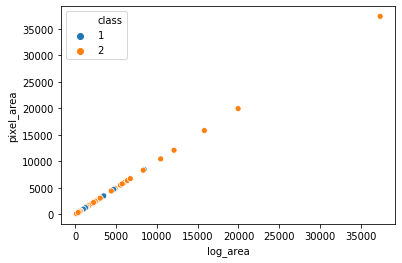

In [1883]:
sns.scatterplot(data = train , x='log_area' , y='pixel_area' , hue = 'class')

In [1884]:
#train.drop(columns = ['grade_A_Component_2', 'x_component_1', 'x_component_3', 'x_component_4', 'pixel_area'], inplace = True)

In [1885]:
train['y_diff'] = train['ymax'] - train['ymin']
train['x_diff'] = train['xmax'] - train['xmin']
#train['diff_area'] = train['log_area'] - train['pixel_area']
train['area'] = train.y_diff * train.x_diff

test['y_diff'] = test['ymax'] - test['ymin']
test['x_diff'] = test['xmax'] - test['xmin']
#train['diff_area'] = train['log_area'] - train['pixel_area']
test['area'] = test.y_diff * test.x_diff

train.drop(columns = ['grade_A_Component_2', 'x_component_1','x_component_2', 'x_component_3', 'x_component_4', 'x_component_5', 'pixel_area'], inplace = True)
test.drop(columns = ['grade_A_Component_2', 'x_component_1','x_component_2', 'x_component_3', 'x_component_4', 'x_component_5', 'pixel_area'], inplace = True)
#test.drop(columns = ['grade_A_Component_2','x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5', 'pixel_area'], inplace = True)

In [1886]:
train.head(1)

grade_A_Component_1  max_luminosity  thickness  xmin  xmax     ymin  \
0                    1             135         65   950   974  1038442   

      ymax    log_area class  y_diff  x_diff   area  
0  1036754  300.120598     2   -1688      24 -40512

In [1887]:
test.head(1)

grade_A_Component_1  max_luminosity  thickness  xmin  xmax    ymin    ymax  \
1                    0             158         99   125   132  189874  189529   

     log_area  y_diff  x_diff  area  
1  421.928609    -345       7 -2415

In [1888]:
label = train['class']
del train['class']
label = label.astype('int')

In [1889]:
train.shape, label.shape, test.shape

((749, 11), (749,), (326, 11))

hfhfh

# ML

In [1890]:
train.shape, label.shape

((749, 11), (749,))

In [1891]:
prediction =[]
def kfold(model,train,label, test, Random_state):
    strat = StratifiedShuffleSplit(n_splits=5, random_state=Random_state)
    
    for tr_index, val_index in (strat.split(train,label)):
            x_train, x_val  = train.loc[tr_index,:],train.loc[val_index,:]
            y_train, y_val = label[tr_index], label[val_index]
            
            model.fit(x_train, y_train)
            tr_pred = model.predict_proba(x_train)
            val_pred = model.predict_proba(x_val)
            
            print('Training Loss : {},   Validation Loss : {}'.format(log_loss(y_train, tr_pred), log_loss(y_val, val_pred)))
          #  print('Training Loss : {},   Validation Loss : {})'.format(accuracy_score(tr_pred, y_train), accuracy_score(val_pred, y_val)))
          #  print('Training Loss : {},   Validation Loss : {})'.format(classification_report(tr_pred, y_train), classification_report(val_pred, y_val)))
    
    return(model.predict_proba(test))

In [1892]:
pred = kfold(GradientBoostingClassifier(random_state=123),train,label,test,7091)

Training Loss : 0.2863203467302133,   Validation Loss : 0.5742347275291642
Training Loss : 0.291826490087922,   Validation Loss : 0.5147430101881891
Training Loss : 0.3014435439721455,   Validation Loss : 0.570222394675763
Training Loss : 0.2960513387197881,   Validation Loss : 0.5438799191645474
Training Loss : 0.2706050075942496,   Validation Loss : 0.5860464559372263


In [1762]:
kfold(SVC(probability=True), train, label, 3523)

Training Loss : 0.6461892191167635,   Validation Loss : 0.6505121226423936
Training Loss : 0.6468710347732852,   Validation Loss : 0.6443618418412475
Training Loss : 0.6434662821691356,   Validation Loss : 0.6456062769467907
Training Loss : 0.6433294654516438,   Validation Loss : 0.650724091465262
Training Loss : 0.6436054983840723,   Validation Loss : 0.6455106793435939


In [1826]:
kfold(RandomForestClassifier(),train,label,3588009)

TypeError: kfold() missing 1 required positional argument: 'Random_state'

In [1827]:
kfold(lgb.LGBMClassifier(),train,label,1096009)

TypeError: kfold() missing 1 required positional argument: 'Random_state'

In [1893]:
final = pd.DataFrame(pred, index=test.index, columns = [1,2])

In [1894]:
final.head()

1         2
1   0.212015  0.787985
4   0.287890  0.712110
9   0.157447  0.842553
10  0.168319  0.831681
12  0.293379  0.706621

In [1903]:
df = pd.DataFrame({1:[1.0 for i in range(1,258)],   2:[0.0 for i in range(1,258)]}, index=ind_1).sort_index()

In [1918]:
answer = pd.concat([final, df]).sort_index()

In [1919]:
answer.to_excel('groupby.xlsx', index = False)

In [1920]:
answer

1         2
0    1.000000  0.000000
1    0.212015  0.787985
2    1.000000  0.000000
3    1.000000  0.000000
4    0.287890  0.712110
5    1.000000  0.000000
6    1.000000  0.000000
7    1.000000  0.000000
8    1.000000  0.000000
9    0.157447  0.842553
10   0.168319  0.831681
11   1.000000  0.000000
12   0.293379  0.706621
13   0.567806  0.432194
14   1.000000  0.000000
15   0.119515  0.880485
16   1.000000  0.000000
17   0.054032  0.945968
18   0.662100  0.337900
19   0.566324  0.433676
20   0.655585  0.344415
21   0.588233  0.411767
22   1.000000  0.000000
23   0.586614  0.413386
24   1.000000  0.000000
25   0.329793  0.670207
26   1.000000  0.000000
27   1.000000  0.000000
28   0.243617  0.756383
29   1.000000  0.000000
..        ...       ...
553  0.386834  0.613166
554  1.000000  0.000000
555  0.276057  0.723943
556  0.152118  0.847882
557  0.676912  0.323088
558  1.000000  0.000000
559  0.036754  0.963246
560  1.000000  0.000000
561  0.182622  0.817378
562  0.106408  0.893592
563  1.000000  0.000000
564  0.719930  0.280070
565  1.000000  0.000000
566  1.000000  0.000000
567  0.388166  0.611834
568  0.393594  0.606406
569  1.000000  0.000000
570  0.223450  0.776550
571  0.332972  0.667028
572  0.168668  0.831332
573  1.000000  0.000000
574  0.400775  0.599225
575  0.131810  0.868190
576  1.000000  0.000000
577  0.568119  0.431881
578  0.834069  0.165931
579  1.000000  0.000000
580  1.000000  0.000000
581  1.000000  0.000000
582  1.000000  0.000000

[583 rows x 2 columns]